In [1]:
import sys
import IPython
print({'python':sys.version, 'IPython':IPython.__version__})

{'python': '3.6.8 (default, Jun 17 2019, 16:38:30) \n[GCC 4.2.1 Compatible Apple LLVM 10.0.0 (clang-1000.10.44.4)]', 'IPython': '7.8.0'}


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell().instance()

In [3]:
from IPython.utils import capture

In [4]:
def describe_content(content, truncate=80):
    s = str(content)
    return s[:truncate-3]+'...' if len(s)>truncate else s
    
def describe_capture(cap):
    if len(cap.outputs)==0:
        print('No output captured')
    else:
        for i, o in enumerate(cap.outputs):
            types = ['{}={}'.format(t, describe_content(content)) for t, content in o.data.items()]            
            print('data for output #{}:\n    {}'.format(i+1, '\n    '.join(types)))

In [29]:
with capture.capture_output() as cap:
    print("ciao")
describe_capture(cap)

No output captured


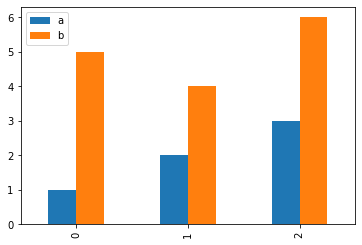

In [30]:
import pandas as pd

with capture.capture_output() as cap:
    df = pd.DataFrame({'a':[1,2,3], 'b':[5,4,6]})
    df.plot(kind='bar')
    
# describe_capture(cap)

In [32]:
cap.

In [28]:
import plotly
with capture.capture_output() as cap:
    plotly.offline.iplot([plotly.graph_objs.Bar(y=[2,1,3])])

describe_capture(cap)

data for output #1:
    application/vnd.plotly.v1+json={'config': {'linkText': 'Export to plot.ly', 'plotlyServerURL': 'https://plot...
    text/html=<div>
        
        
            <div id="8cb48de8-2d54-4993-ac50-c31d8bc2...


In [27]:
cap.outputs[1].data

IndexError: list index out of range

In [33]:
import ipywidgets as widgets

In [34]:
out = widgets.Output(layout={'border': '1px solid black'})
out

Output(layout=Layout(border='1px solid black'))

In [51]:
with out:
    for i in range(10):
        print(i, 'Hello world!')

0 Hello world!
1 Hello world!
2 Hello world!
3 Hello world!
4 Hello world!
5 Hello world!
6 Hello world!
7 Hello world!
8 Hello world!
9 Hello world!


In [52]:
out.outputs

({'output_type': 'stream',
  'name': 'stdout',
  'text': 'Output appended with append_stdout'},)

In [38]:
out.append_stdout('Output appended with append_stdout')

In [47]:
@out.capture(clear_output=True)
def bad_callback():
    print('This is about to explode')
    return 1.0 / 0.0

In [50]:
with out.capture() as _out:
    print('ciao')

AttributeError: __enter__

In [49]:
out.outputs

({'output_type': 'stream',
  'name': 'stdout',
  'text': 'Output appended with append_stdout'},)

In [67]:
%%capture out
df = pd.DataFrame({'a':[1,2,3], 'b':[5,4,6]})
df.plot(kind='bar')

In [68]:
out.stdout

''

In [69]:
out.outputs[0].data

{'text/plain': '<matplotlib.axes._subplots.AxesSubplot at 0x122099978>'}